# Ensemble Methods

In this notebook, we will cover the concepts of ensemble methods. We will discuss overfitting, ensemble methods, and Random Forests.

## Overfitting

### Typical Case:
- Training on a dataset results in an accuracy metric of 99%.
- Using the model on test data results in a low accuracy metric, for example, 58%.
- Observation: The model does not generalize well from the training data to real-world data.

### Major Problem:
- Noise is always present, but our model should be able to separate the signal from the noise.
- Observation: A model with a large number of predictors or one not based on regularization may fit more to the noise than the signal, leading to overfitting.

### Solutions:
- Several techniques can be used:
  - Cross-validation:
    - Use the initial training data to generate several training-test mini-batches.
    - Use these splits to tune the model.
  - Predictor Selection:
    - Use techniques such as forward or backward selection.
  - Regularization:
    - Techniques like Lasso, Ridge, ElasticNet.
    - Decision tree pruning.
  - Ensemble Techniques

## Ensemble Methods

### Ensemble Methods:
- Ensembles are machine learning methods that combine predictions from multiple models.
- Goal:
  - Reduce variance,
  - Reduce bias,
  - Improve predictions.

### Categories:
- **Parallel**: Ensemble method where constituent models are generated independently of each other.
- **Sequential**: Ensemble method where learners are generated sequentially, depending on each other. Models are trained one after another, with each new model needing information from the previous training.

### Techniques:
- **Bagging (Parallel)**: Aims to reduce the risk of overfitting complex models.
- **Boosting (Sequential)**: Aims to improve the predictive flexibility of simple models.

## Bagging

### Bagging: Bootstrap Aggregation
- Bagging generates new datasets from existing data.
  - Create samples of existing data with replacement.
  - There may be repeated values in each of the newly created datasets.
  - Reduces model variance by using the average obtained from different samples.

### Steps in Bagging:
1. Bootstrap sampling.
2. Aggregation.

### Bootstrap Sampling:
- Goal: Obtain subsets of data using bootstrap sampling.
- Approach: Given a dataset, select N observations randomly, with replacement.
- Use: These observations form a subset used in model development.

### Aggregation:
- Once all models are obtained, their outputs (predictions) must be aggregated to obtain a single global prediction.
  - Several approaches for aggregation: Classification or regression.

### Hard vs Soft Voting:
- **Hard Voting**: Take the majority of votes for the predicted value.
- **Soft Voting**: Calculate the probabilities for each label and take the average probabilities for each label. The highest value gives the prediction.

## Random Forest

### Random Forest:
- Observation: A single decision tree may not perform adequately (overfitting or underfitting).
- Ensemble method: Bagging.
- Algorithm: Decision tree.
- Choose a set of m predictors from a number p of predictors.

### Prediction:
- **Regression**: Average the results.
- **Classification**: Majority voting.

### Creating a Random Forest:
- A random forest is created using the following procedure:
  - Choose the number of desired trees in the forest (M).
  - Choose the number of samples desired for each tree (n).
  - Choose the number of predictors desired in each tree (f).
  - For each tree in M:
    - Select n samples with replacement among all observations.
    - Select f predictors randomly.
    - Train a decision tree using the dataset of n samples with f predictors.
    - Save the decision tree.


Random Forest Classification Accuracy: 0.9
Confusion Matrix:
[[12  3]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

      Effect       1.00      0.80      0.89        15
   No effect       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



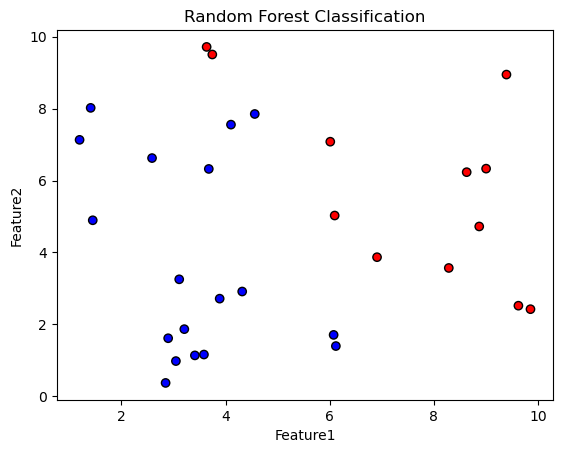

Random Forest Regression Mean Squared Error: 10.197198321530005


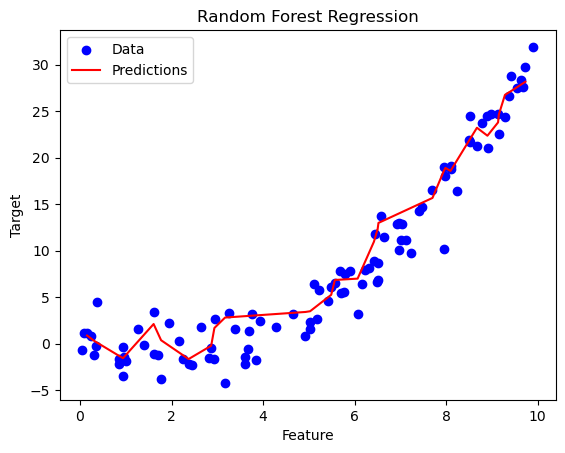

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

# Generate fictitious data for classification
np.random.seed(42)
X_class = np.random.rand(100, 2) * 10
y_class = np.where(X_class[:, 0] + X_class[:, 1] > 10, 'Effect', 'No effect')

# Create DataFrame
df_class = pd.DataFrame(X_class, columns=['Feature1', 'Feature2'])
df_class['Class'] = y_class

# Split the data into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Create and train the Random Forest model for classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = rf_clf.predict(X_test_class)

# Evaluate the model
print("Random Forest Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Plot the points with predicted labels
plt.scatter(X_test_class[:, 0], X_test_class[:, 1], c=np.where(y_pred_class == 'Effect', 'red', 'blue'), edgecolor='k', label='Test data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Random Forest Classification')
plt.show()

# Generate fictitious data for regression
X_reg = np.random.rand(100, 1) * 10
y_reg = 1 - 2 * X_reg[:, 0] + 0.5 * X_reg[:, 0]**2 + np.random.randn(100) * 2  # Polynomial relationship with noise

# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Create and train the Random Forest model for regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluate the model
print("Random Forest Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

# Plot the results
plt.scatter(X_reg, y_reg, color='blue', label='Data')
plt.plot(np.sort(X_test_reg[:, 0]), rf_reg.predict(np.sort(X_test_reg, axis=0)), color='red', label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Random Forest Regression')
plt.legend()
plt.show()
